## Домашнее задание 27
### Козел А.Г. 15.02.2023
Провести обучение сети на наборе данных notMNIST_small.

In [18]:
import sys
import sklearn
import tensorflow as tf
import numpy as np
import os
import random
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

import pandas as pd
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense


In [2]:
tf.__version__

'2.10.1'

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Загружаем файлы

In [4]:
data = 'c:\\Users\\37533\\Desktop\\jupyter\\ДЗ_27\\notMNIST_small'

In [5]:
df = []
folders = []
 
for folder in os.listdir('./notMNIST_small'):
    for file in os.listdir(os.path.join(data, folder)):
        try:
            img = Image.open(os.path.join(data, folder, file))
            if (np.array(img)==np.ones(shape=(28,28), dtype=np.uint8)).all()==False and (np.array(img)==np.zeros(shape=(28,28), dtype=np.uint8)).all()==False:
                df.append(np.asarray(img))
                folders.append(folder)
                      
            else:
                continue
        except:
            None 

df = np.asarray(df)
folders = np.asarray(folders)

In [6]:
df.shape

(18724, 28, 28)

Пыталась отфильтровать нулевые и единичные матрицы, но что-то ничего не вышло. Тоже количество осталось

In [47]:
set(folders)

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

<Figure size 640x480 with 0 Axes>

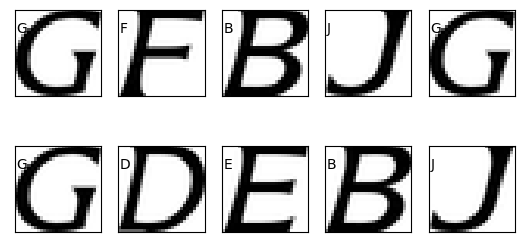

In [8]:
plt.gray()
fig = plt.figure(figsize=(5, 5))  # размер
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5)  # параметры макета подграфика
for i in range(10):
    folder_random = random.choice(folders)
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(plt.imread(os.path.join(data, folder_random, file)),  cmap=plt.cm.binary) 
# для выбора другой цветовой гаммы https://matplotlib.org/3.1.0/_images/sphx_glr_colormaps_003.png
    ax.text(0, 7, str(folder_random)) # целевая метка класса

### Подготовка данных

In [12]:
# Перемешаем случайным образом исходные массивы изображений и меток
#np.random.seed(RANDOM_STATE = 42)
y = folders
X =df
np.random.shuffle(np.arange(X.shape[0]))
X, y = X[np.arange(X.shape[0])], y[np.arange(X.shape[0])]
# Выполним нормализацию значений
X = X / 255.0
# Выполним разбиение масивов на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

### Модель

In [50]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation="relu"), 
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation='softmax')
])



In [51]:
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_5 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_54 (Dense)            (None, 512)               401920    
                                                                 
 dense_55 (Dense)            (None, 256)               131328    
                                                                 
 dense_56 (Dense)            (None, 128)               32896     
                                                                 
 dense_57 (Dense)            (None, 10)                1290      
                                                     

In [52]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [54]:
%%time
history = model.fit(X_train, y_train, batch_size=512, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20


ValueError: in user code:

    File "C:\Users\37533\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\37533\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\37533\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\37533\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\37533\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\37533\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\37533\anaconda3\envs\tensorflow\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\37533\anaconda3\envs\tensorflow\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\37533\anaconda3\envs\tensorflow\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\37533\anaconda3\envs\tensorflow\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible
